<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Causation

_Authors: Alexander Egorenkov (DC)_

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('fivethirtyeight')

## Correlation is About Inference, Causation Is About Control

### Example 1

**Observation:** Asthma is *negatively correlated* with complications for patients diagnosed with pneumonia.
- **Explanation 1:** Asthma has a protective effect for people with pneumonia.
- **Explanation 2:** Patients with asthma who come into the ER with pneumonia are treated more aggresively than those without asthma.

If Explanation 1 is correct, then you might be more inclined to send a pneumonia patient home if he or she has asthma.

If Explanation 2 is correct, then that approach would kill people.

### Example 2

**Observation:** Children who wait for a second marshmallow in the [Stanford marshmallow experiment](https://en.wikipedia.org/wiki/Stanford_marshmallow_experiment) have better outcomes on average later in life.
- **Explanation 1:** Waiting for a second marshmallow is a sign of self-control, which is extremely valuable.
- **Explanation 2:** Children from poor families are conditioned to take what they can get when they can get it, because it might not be there later. Poverty causes them to have worse outcomes on average later in life through a variety of mechanisms, many of which are unrelated to self-control.

If Explanation 1 is correct, then teaching children self-control would help them achieve more.

If Explanation 2 is correct, then the real problem is poverty.

### Upshot

"$X$ is **correlated** with $Y$" means that *knowing* the value of $X$ can help you *infer* the value of $Y$ (using a linear model) when you don't interfere with the system.

"$X$ **causes** $Y$" means that you can wiggle $Y$ by wiggling $X$.

Correlation is about **information**. Causation is about **control**.

If you want to predict something so that you can **respond to it**, then correlation is sufficient.

If you want to predict something so that you can **intervene to change it**, then distinguishing causes from mere correlates is essential.

**Examples:** 

- For instance, predicting when a part on a locomotive is going to break down so that you can have parts ready when they are needed is a pure prediction problem -- no causation needed.
- However, predicting when a part on a locomotive is about to break so that you can intervene to prevent it requires causal understanding -- for instance, you might run into a situation like the asthma-and-pneumonia case where causes of a bad outcome are not positively correlated with it because there are existing systems in place to address them.

## Review of Correlation

Correlation is a number between -1 and 1 that quantifies how predictable one variable is as a linear function of the other.

**(Pearson) Correlation Coefficient:**

![](../assets/images/correlation_examples.png)

## Determining whether $X$ causes $Y$

- **Best:** Perform an experiment in which you randomly vary $X$ and observe $Y$.
- **Alternative approach 1:** Consider some heuristics such as the following:
    - Strength of association
    - Consistency
    - Specificity
    - Temporality
    - Biological gradient
    - Mechanistic plausibility
    - Coherence
    - Analogy
- **Alternative approach 2:** Use advanced techniques such as instrumental variable analysis, identifying natural experiments, graphical causal modeling search algorithms.

**Strength (effect size)**: A small association does not mean that there is not a causal effect, although the larger the association, the more likely the effect is to be causal.

**Consistency (reproducibility)**: Consistent findings observed by different persons in different places with different samples strengthens the likelihood of an effect.

**Specificity**: Causation is likely if there is a very specific population at a specific site and a disease with no other likely explanation. The more specific an association between a factor and an effect, the greater the probability of a causal relationship.

**Temporality**: The effect has to occur after the cause (and, if there is an expected delay between the cause and expected effect, then the effect must occur after that delay).

**Biological gradient**: Greater exposure should generally lead to greater incidence of the effect. However, in some cases, the mere presence of the factor can trigger the effect. In other cases, an inverse proportion is observed: greater exposure leads to lower incidence.

**Plausibility**: A plausible mechanism between cause and effect is helpful (but Hill noted that knowledge of the mechanism is limited by current knowledge).

**Coherence**: Coherence between epidemiological and laboratory findings increases the likelihood of an effect. However, Hill noted that "... lack of such [laboratory] evidence cannot nullify the epidemiological effect on associations."

**Analogy**: The effect of similar factors may be considered.

## What Causal Structures Can Give Rise to a Correlation Between $X$ and $Y$?

- $X$ causes $Y$.
- $Y$ causes $X$.
- Some third factor causes both $X$ and $Y$.
- $X$ and $Y$ both cause some third factor, and we sample that factor unevenly.

### X causes Y.
![](../assets/images/x-cause-y.png)

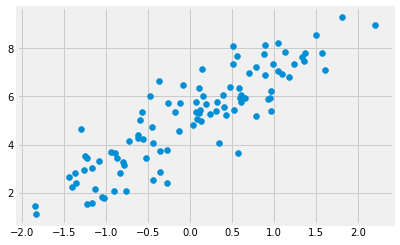

In [2]:
# Example where Y is a function of X:
X = np.random.randn(100)
Y = 5 + 2*X + np.random.randn(100)
dag = pd.DataFrame({'X':X, 'Y':Y})

fig, ax = plt.subplots()
ax.scatter(X, Y);

### Y causes X.
![](../assets/images/y-cause-x.png)

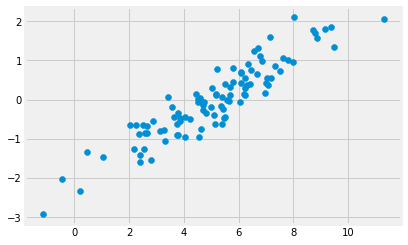

In [3]:
# Example where X is a function of Y:
Y = np.random.randn(100)
X = 5 + 2*Y + np.random.randn(100)
dag = pd.DataFrame({'X':X, 'Y':Y})

fig, ax = plt.subplots()
ax.scatter(X, Y);

### There is a third common factor that causes both X and Y.
![](../assets/images/z-cause-xy.png)

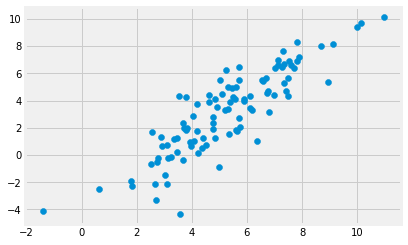

In [4]:
# Both X and Y are functions of Z:
Z = np.random.randn(100)

X = 5 + 2*Z + np.random.randn(100)
Y = 3 + 3*Z + np.random.randn(100)

common_cause = pd.DataFrame({'X':X, 'Y':Y, 'Z':Z})

fig, ax = plt.subplots()
ax.scatter(X, Y);

### X and Y cause a third factor, but our data collect the third factor unevenly.

![](../assets/images/xy-causez.png)

This is tricky -- $X$ and $Y$ are probabilistically independent unconditionally, but dependent conditional on $Z$.

Consider this example:

- $Z$: Your throat is sore.
- $X$: You have strep throat.
- $Y$: You have bronchitis.

Let's say that having strep throat and having bronchitis are probabilistically independent -- they are separate diseases caussed by separate infectious agents that neither promote nor interfere with one another and they do not have any common causes. Nevertheless, when you go to the doctor's office with a sore throat and get a negative result on a strep test, you are likely to be sent home with a diagnosis of bronchitis.

**Moral:** Common effects induce *conditional dependence* among their causes.

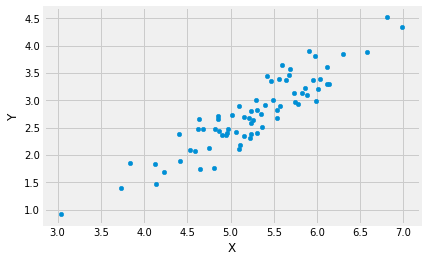

In [5]:
# Z is a function of X and Y:
X = 5 + np.random.randn(300)
Y = 3 + np.random.randn(300)
Z = X - Y + 0.1*np.random.randn(300)

common_effect = pd.DataFrame({'X':X, 'Y':Y, 'Z':Z})
biased_sample = common_effect[(2 < common_effect['Z']) & (common_effect['Z'] < 3)]
biased_sample.plot(kind='scatter', x='X', y='Y');

## Confounding

Suppose that people who carry cigarette lighters are 2.4 times more likely to contract lung cancer than people who don’t carry lighters.

Does this mean that the lighters are causing cancer?

As we've noted before, if lighters and cancer are both caused by smoking, there will be a correlation between lighters and cancer. This isn't the only possible diagram, but it makes the most sense.

![](../assets/images/smoke-lighter-cancer.png)

If we believe the structure above, conditioning on smoking by only looking at non-smokers removes the correlation between lighters and cancer. Smoking is a **confounder** of the causal relationship between having a lighter and contracting lung cancer.

In general, a **confounder** for the hypothesis that X causes Y is a variable that makes X correlated with Y by a path that doesn't run from X to Y.

Inferring causation from correlation is valid only when there is **no confounding** (e.g. due to uncontrolled common causes or selection bias for common effects) and the direction of causation is correct.

## Upshot

- A correlation is consistent with several causal hypotheses, which is why people say **you can't infer causation from correlation**.
- Outside of randomized experiments, causal inference is **hard**. (We won't talk about how to do it in this course.)
- If you are choosing a data science project (e.g. your final project for this course) and you don't have data from randomized experiments, **you will have an easier time if you choose a pure prediction problem** that doesn't require causal understanding (i.e., a problem in which you only want to respond to the thing you are predicting, and not intervene to affect it).

## Example

In [6]:
# Read advertising data into a DataFrame.
# We use index_col to tell Pandas that the first column in the data has row labels.
book_url = 'http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv'
data = pd.read_csv(book_url, index_col=0)

**Features:**

- **TV:** Advertising dollars spent on TV for a single product in a given market (in thousands of dollars).    
- **Radio:** Advertising dollars spent on radio.
- **Newspaper:** Advertising dollars spent on newspaper.

**Response:** Sales of a single product in a given market (in thousands of widgets).

**Observational Units:** Markets where the ads have been shown.

In [7]:
# Inspect first five rows of the data
# /scrub/
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Let's pretend you work for the company that manufactures and markets this new device. The company might ask you the following: "On the basis of this data, how should we spend our advertising money in the future?"

In [8]:
# Calculate the correlation matrix using the DataFrame's built-in `.corr()` method:
# /scrub/
data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


When we have a large amount of data, the correlation matrix may be too difficult to read. It can help to make a plot.

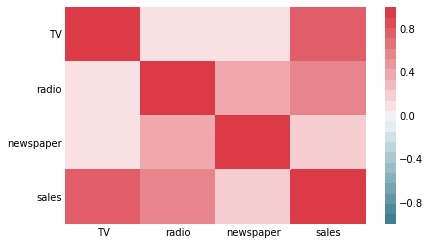

In [9]:
# Use Seaborn's `.heatmap()` function to make a plot of the correlation matrix.
# /scrub/
ax = sns.heatmap(
    data.corr(),
    vmin=-1, vmax=1, # Make the scale span -1 to 1
    cmap=sns.diverging_palette(220, 10, n=21), # Use a diverging blue-red scale with 21 levels
)

Of course, looking at linear association doesn't show us the whole picture. We can get a more detailed look with a scatterplot matrix.

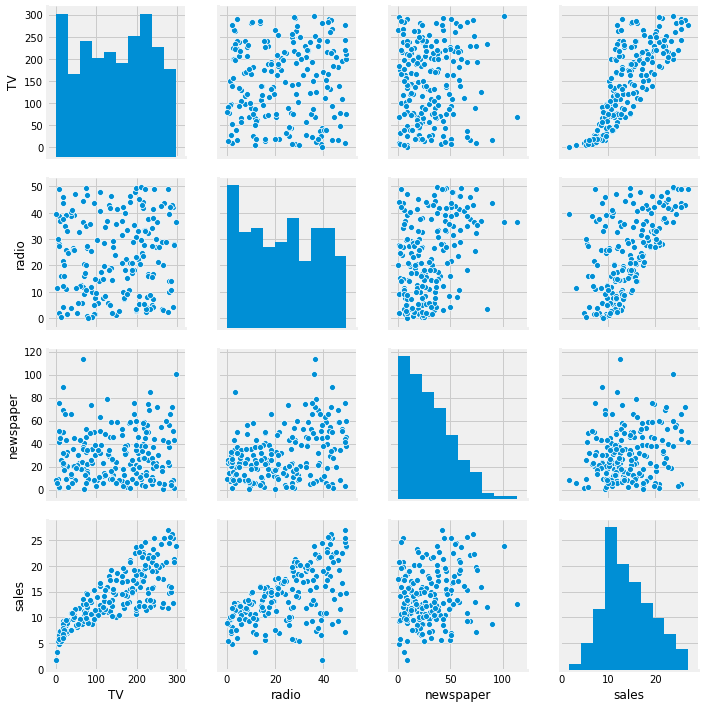

In [10]:
# Use Seaborn's `.pairplot()` function to make joint scatterplots of the data.
# This function returns a special `seaborn` object called a `PairGrid`, which we will capture as `g`.
# /scrub/
g = sns.pairplot(data)

In [11]:
# How to get the pairplot axes in case you want to change something
# /scrub/
g.axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a15683d30>,
      dtype=object)

**Exercise (6 mins., in groups)**

- Below, we filled in how to make a scatterplot for the columns `sales` vs `TV`. Using this as an example, make scatterplots for `sales` vs `radio` and `sales` vs `newspaper`.

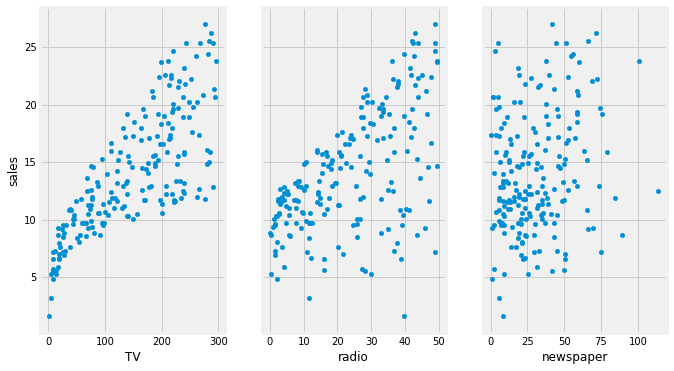

In [12]:
# Visualize the relationship between the features and the response using scatterplots:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, sharey=True, figsize=(10, 6))

data.plot(kind='scatter', x='TV', y='sales', ax=ax0);
# /scrub/
data.plot(kind='scatter', x='radio', y='sales', ax=ax1);
data.plot(kind='scatter', x='newspaper', y='sales', ax=ax2);

- Is there a relationship between ads and sales? Which type of ads?

/scrub/

There appears to be a relationship. The relationship appears strongest between TV and sales.

- Can we say that ads of this type *cause* sales? Why or why not?

/scrub/

No. We haven't done an experiment, and we don't have supplementary information to support our heuristics. There's some plausibility to the idea that sales cause job ads (companies advertise in markets where they have a foothold), and market size at least seems like an obvious common cause.

- Would knowing how much money was spent on TV ads in a given market help you predict sales for that market? Why or why not?

/scrub/

Yes, because correlation is sufficient for predictive purposes.

- Can we say that increasing spending on TV ads in a particular market would be a good strategy for increasing sales in that market?

/scrub/

Not necessarily -- e.g. it's possible that the company just spends more on TV ads in big markets, where sales would be greater anyway, and that the TV ads have no effect.

$\blacksquare$

## Summary

1. **Multiple causal structures that have different implications for action can give rise to the same patterns of correlation**.
1. **The best evidence about causation comes from randomized experiments**.
1. In the absence of randomized experiments, **distinguishing betwen causation and correlation is hard, and it requires subject-matter expertise.**

**Good news for data scientists:** Because causal inference requires substantive knowledge, automating it will not be possible in the foreseeable future.